<a href="https://colab.research.google.com/github/Ftajedini/Github_Tutorial/blob/main/automate_building_footprint_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!pip install arcgis
#!pip install timm
#!pip install fastai
##!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
#!pip3 install torch torchaudio torchvision torchtext torchdata

In [1]:
!pip install fastai==2.0.19
!pip install fastai2==0.0.30
!pip install fastcore==1.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.4/188.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 8.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torchvision<0.8,>=0.7 (from fastai) (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1)
ERROR: No matching distribution found for torchvision<0.8,>=0.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 621.7 kB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.5.29
    Uninstalling fastcore-1.5.29:
      Successfully uninstalled fastcore-1.5.29
ERROR: pip's dependency resolver d

<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-type" content="text/html; charset=utf-8">
<meta http-equiv="Content-Security-Policy" content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'">
<title>Page not found &middot; GitHub Pages</title>
<style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: table-cell
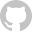
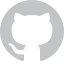

In [2]:
!curl -s https://course.fast.ai/setup/colab

In [19]:
import os
import fastai
import torch, torchvision
import torchvision.transforms as transforms
from arcgis import*
from arcgis.gis import GIS
from fastai import*
from torchvision import*
from pathlib import Path
from arcgis.learn import MaskRCNN, prepare_data
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from fastai.vision.all import*


In [24]:
import arcgis
import numpy as np
from matplotlib import use
from numpy.core.fromnumeric import resize
from fastai.vision.data import imagenet_stats, ImageList, bb_pad_collate
from fastai.vision.transform import (
        crop,
        rotate,
        dihedral_affine,
        brightness,
        contrast,
        skew,
        rand_zoom,
        get_transforms,
        flip_lr,
        ResizeMethod,
    )


ImportError: ignored

In [26]:
from fastai import __version__
print(__version__)

2.7.13


In [29]:
from fastai.vision import ImageDataBunch, parallel, ifnone

ImportError: ignored

In [27]:
gis = GIS()

##Model training

In [10]:
training_data = gis.content.get('637825446a3641c2b602ee854776ed47')
training_data

<Item title:"automate_building_footprint_extraction_using_instance_segmentation" type:Image Collection owner:api_data_owner>

In [11]:
filepath = training_data.download(file_name=training_data.name)

In [12]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [13]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [28]:
data = prepare_data(data_path,
                    batch_size=4,
                    chip_size=400)

Exception: ignored

##Visualize training data

In [ ]:
data.show_batch(rows=4)

In [ ]:
model = MaskRCNN(data)

In [ ]:
lr = model.lr_find()
lr

#Train the model

In [ ]:
model.fit(10,lr=lr)

#Visualize detected building footprints

In [ ]:
model.show_results()

In [ ]:
model.show_results(mode='bbox_mask')

##save model

In [ ]:
model.save('Building_footprint_10epochs', publish=True)